In [1]:
import json
import numpy
import itertools
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import seaborn as seabornInstance
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [2]:
file = "./chloe.json"
file2 = "./beliefs.txt"
file3 = "./positive.txt"
file4 = "./negative.txt"
file5 = "./users.txt"
file6 = "./key.txt"

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.width', 200)

In [140]:
def extract():
    email = []
    question = []
    answer = []
    date = []
    with open (file, "r") as f:
        data = json.load(f)
    for quetion, item in data.items():
        questionnaire = data['quetion']
        usernames = data['users']
        for results, result in questionnaire.items():
            if 'email' in result.keys():
                if "textAns" not in result.keys():
                    email = numpy.append(email , result['email'])
                    question = numpy.append(question , result['que'])
                    answer = numpy.append(answer , result['answer'])
                    date = numpy.append(date, result['date'])

        numberofquestions =  (len(questionnaire))

        email = email[0:numberofquestions]
        question = question[0:numberofquestions]
        answer = answer[0:numberofquestions]
        date = date[0:numberofquestions]

        results = numpy.stack((email, question, answer, date, ),axis = 1)
        result = pd.DataFrame(results , columns=['email', 'question', 'answer', 'date' ])
        result = result.astype({ 'answer': numpy.float64})
        #print(result)
        #contain_fifty = result[result['answer'] == 50.0].index
        #result = result.drop(contain_fifty)
    return result

extract = extract()
print(len(extract.email))

3999


In [138]:
def emails():
    uid = []
    emailid = []
    areudepress = []
    gender = []
    email = []
    question =[]
    answer = []
    with open (file, "r") as f:
        data = json.load(f)
    for quetion, item in data.items():
        usernames = data['users']
        questionnaire = data['quetion']
        for results, result in questionnaire.items():
            if 'email' in result.keys():
                if "textAns" in result.keys():
                    email = numpy.append(email , result['email'])
                    question = numpy.append(question , result['que'])
                    answer = numpy.append(answer , result['answer'])
        for username, r in usernames.items():
            uid = numpy.append( uid, r['uid'])
            unduplicated_uid = list(dict.fromkeys(uid))
            uid = unduplicated_uid

            emailid = numpy.append( emailid, r['email'])
            unduplicated_email = list(dict.fromkeys(emailid))
            emailid = unduplicated_email

            gender = numpy.append( gender, r['gender'])

    numberofquestions =  (len(questionnaire))
    email = email[0:numberofquestions]
    question = question[0:numberofquestions]
    answer = answer[0:numberofquestions]

    results = numpy.stack((email, question, answer ),axis = 1) # 1
    result = pd.DataFrame(results , columns=['email', 'question', 'answer' ])

    length1 = len(emailid)
    shorten = int(len(gender)/2)

    #gender = gender[0:shorten]
    #areudepress = areudepress[0:shorten]
    emailid = numpy.array(emailid)
    #emails = numpy.stack((uid, emailid, gender, areudepress),axis = 1)
    result.drop_duplicates(keep='last', inplace = True)
    #result.set_index('email', inplace = True)
    result.sort_index(axis=0, inplace = True) # 0
    d = result.groupby(['email', 'question']).head()#.stack(level = -1)
    # d.drop(d.index[[28,29,30,31]])
    f_email = d['email']
    return f_email
    #print(f_email.drop_duplicates())
    
emails = emails()
len(emails)

79

In [6]:
def userfile():
    with open (file5, "r") as f:
        use = f.read()
    userss = numpy.fromstring(use , sep=" ")
    rows = int(len(userss)/5)
    a  = userss.reshape((rows, 5))
    b = pd.DataFrame((a) , columns = ['Gender', 'Depress_pres', 'Depress_life', 'Anxious_pres', 'Anxious_life'])
    with open (file6, "r") as g:
        rows = list(g)
    useries = []
    useries = pd.DataFrame((rows), columns = ['UID'] )
    useries = useries.replace('\n','', regex=True)
    d = pd.concat([useries, b], axis = 1)
    #these values may need to change as code develops further!
    #e = d[:-4]
    #f = e.drop([17])
    return (d)

userfile = userfile()
userfile

,UID,Gender,Depress_pres,Depress_life,Anxious_pres,Anxious_life
0,ztxvfFU4vDYixvvpLMdkksIvzzF3,1.0,0.0,1.0,0.0,0.0
1,vRcue1hkwYOaHAOoQ1IfDzhMKtO2,1.0,0.0,0.0,0.0,0.0
2,ujcjkDhhrycHHotfUFDl6fQu75h2,1.0,0.0,0.0,0.0,0.0
3,opLPkSfZW3Ztb5CrbjUb5p3MohG2,0.0,1.0,0.0,0.0,0.0
4,oThj1RAi5od8KPh36HmFRmob9eI3,0.0,0.0,0.0,0.0,0.0
5,mEX6LEnG9qT179NKSLy8OT8Pojs1,1.0,1.0,1.0,0.0,0.0
6,l1rXfDAWRtWi3Itl0MQN1BvJ6Z82,0.0,0.0,0.0,0.0,0.0
7,gsoTHCIX63UPIRLh25UicO5t6L43,0.0,0.0,0.0,0.0,0.0
8,WrFR9Ah0rMPSJ79SgaYDlgiyYrb2,1.0,0.0,0.0,0.0,0.0
9,WljS9bf7awMYqktIA7ua5O9kqXE2,1.0,0.0,0.0,0.0,0.0


In [7]:
def gender(data, users):
    Gender = users['Gender']
    UID = users['UID']
    replacement = dict(zip(UID, Gender))
    data.replace(replacement, inplace = True)
    groupedquestions = data.groupby(['question', 'email']).agg( ['mean','std'])
    a = groupedquestions.unstack(level = -1)

    return (a)

gender(extract, userfile)

answer                                                                                                                                  \
                                                         mean                                                                                                                                   
email                                                     0.0         1.0 0Sc46Wh9qKZiCIBVgu9XoiVkaw82 F8TuXTsB4pMLN4TVfNJxeKQWN1D3 HyTX14qFhhVHHeC6A2lv9Y45VSJ2 Rl8BFFOxa2QBfBPew3AzeBTrBH93   
question                                                                                                                                                                                        
Compared to other people my age, I am successfull   55.000000   91.000000                    50.000000                          NaN                          NaN                         81.0   
Compared to other people my age, I am unsuccessful  53.750000   28.000000                          NaN                          NaN                          NaN                          NaN   
Compared to other people that I know, I am succ...  53.727273   66.000000                    50.000000                          NaN                          NaN                          NaN   
Compared to other people that I know, I am unsu...  50.000000   37.600000                    50.000000                          NaN                          NaN                          NaN   
Deep down, I feel as if I donâ€™t deserve to be...  35.400000   21.600000                          NaN                          NaN                          NaN                          NaN   
Gratitude comes easily to me                        54.153846         NaN                    27.000000                          NaN                          NaN                          NaN   
I always achieve my full potential in life          38.333333   64.333333                    50.000000                         50.0                          NaN                          NaN   
I always achieve what I set out to do               56.375000    4.000000                    85.000000                          NaN                          NaN                          NaN   
I always believe in myself                          56.375000   38.500000                    86.000000                          NaN                          NaN                          NaN   
I always feel as though I am capable of functio...  54.875000   76.000000                          NaN                         50.0                         50.0                          NaN   
I always feel as though I am enough                 65.000000   46.400000                          NaN                         50.0                          NaN                          NaN   
I always feel supported by the people around me     50.000000   40.000000                    50.000000                         50.0                         50.0                          NaN   
I always have people there to support me when I...  57.916667   58.000000                    50.000000                          NaN                         50.0                         34.0   
I always work in my best interest                   52.266667   51.250000                    79.000000                         50.0                          NaN                          NaN   
I am a failure                                      45.000000   50.000000                          NaN                          NaN                          NaN                          NaN   
I am a success                                      59.222222   50.000000                          NaN                          NaN                          NaN                          NaN   
I am able to hold my ground in situations of co...  47.315789   71.666667                          NaN                         50.0                          NaN                          NaN   
I 

In [8]:
def currentlydepressed(data, users):
    Depressed = users['Depress_pres']
    UID = users['UID']
    replacement = dict(zip(UID, Depressed))
    data.replace(replacement, inplace = True)
    groupedquestions = data.groupby(['question', 'email']).agg( ['mean','std'] )
    a = groupedquestions.unstack(level = -1)

    return (a)

currentlydepressed(extract, userfile)

answer                                                                                                                                  \
                                                         mean                                                                                                                                   
email                                                     0.0         1.0 0Sc46Wh9qKZiCIBVgu9XoiVkaw82 F8TuXTsB4pMLN4TVfNJxeKQWN1D3 HyTX14qFhhVHHeC6A2lv9Y45VSJ2 Rl8BFFOxa2QBfBPew3AzeBTrBH93   
question                                                                                                                                                                                        
Compared to other people my age, I am successfull   55.000000   91.000000                    50.000000                          NaN                          NaN                         81.0   
Compared to other people my age, I am unsuccessful  53.750000   28.000000                          NaN                          NaN                          NaN                          NaN   
Compared to other people that I know, I am succ...  53.727273   66.000000                    50.000000                          NaN                          NaN                          NaN   
Compared to other people that I know, I am unsu...  50.000000   37.600000                    50.000000                          NaN                          NaN                          NaN   
Deep down, I feel as if I donâ€™t deserve to be...  35.400000   21.600000                          NaN                          NaN                          NaN                          NaN   
Gratitude comes easily to me                        54.153846         NaN                    27.000000                          NaN                          NaN                          NaN   
I always achieve my full potential in life          38.333333   64.333333                    50.000000                         50.0                          NaN                          NaN   
I always achieve what I set out to do               56.375000    4.000000                    85.000000                          NaN                          NaN                          NaN   
I always believe in myself                          56.375000   38.500000                    86.000000                          NaN                          NaN                          NaN   
I always feel as though I am capable of functio...  54.875000   76.000000                          NaN                         50.0                         50.0                          NaN   
I always feel as though I am enough                 65.000000   46.400000                          NaN                         50.0                          NaN                          NaN   
I always feel supported by the people around me     50.000000   40.000000                    50.000000                         50.0                         50.0                          NaN   
I always have people there to support me when I...  57.916667   58.000000                    50.000000                          NaN                         50.0                         34.0   
I always work in my best interest                   52.266667   51.250000                    79.000000                         50.0                          NaN                          NaN   
I am a failure                                      45.000000   50.000000                          NaN                          NaN                          NaN                          NaN   
I am a success                                      59.222222   50.000000                          NaN                          NaN                          NaN                          NaN   
I am able to hold my ground in situations of co...  47.315789   71.666667                          NaN                         50.0                          NaN                          NaN   
I 

In [9]:
def lifetimedepressed(data, users):
    Depressed = users['Depress_life']
    UID = users['UID']
    replacement = dict(zip(UID, Depressed))
    data.replace(replacement, inplace = True)
    groupedquestions = data.groupby(['question', 'email']).agg( ['mean','std'] )
    a = groupedquestions.unstack(level = -1)

    return (a)

lifetimedepressed(extract,userfile)

answer                                                                                                                                  \
                                                         mean                                                                                                                                   
email                                                     0.0         1.0 0Sc46Wh9qKZiCIBVgu9XoiVkaw82 F8TuXTsB4pMLN4TVfNJxeKQWN1D3 HyTX14qFhhVHHeC6A2lv9Y45VSJ2 Rl8BFFOxa2QBfBPew3AzeBTrBH93   
question                                                                                                                                                                                        
Compared to other people my age, I am successfull   55.000000   91.000000                    50.000000                          NaN                          NaN                         81.0   
Compared to other people my age, I am unsuccessful  53.750000   28.000000                          NaN                          NaN                          NaN                          NaN   
Compared to other people that I know, I am succ...  53.727273   66.000000                    50.000000                          NaN                          NaN                          NaN   
Compared to other people that I know, I am unsu...  50.000000   37.600000                    50.000000                          NaN                          NaN                          NaN   
Deep down, I feel as if I donâ€™t deserve to be...  35.400000   21.600000                          NaN                          NaN                          NaN                          NaN   
Gratitude comes easily to me                        54.153846         NaN                    27.000000                          NaN                          NaN                          NaN   
I always achieve my full potential in life          38.333333   64.333333                    50.000000                         50.0                          NaN                          NaN   
I always achieve what I set out to do               56.375000    4.000000                    85.000000                          NaN                          NaN                          NaN   
I always believe in myself                          56.375000   38.500000                    86.000000                          NaN                          NaN                          NaN   
I always feel as though I am capable of functio...  54.875000   76.000000                          NaN                         50.0                         50.0                          NaN   
I always feel as though I am enough                 65.000000   46.400000                          NaN                         50.0                          NaN                          NaN   
I always feel supported by the people around me     50.000000   40.000000                    50.000000                         50.0                         50.0                          NaN   
I always have people there to support me when I...  57.916667   58.000000                    50.000000                          NaN                         50.0                         34.0   
I always work in my best interest                   52.266667   51.250000                    79.000000                         50.0                          NaN                          NaN   
I am a failure                                      45.000000   50.000000                          NaN                          NaN                          NaN                          NaN   
I am a success                                      59.222222   50.000000                          NaN                          NaN                          NaN                          NaN   
I am able to hold my ground in situations of co...  47.315789   71.666667                          NaN                         50.0                          NaN                          NaN   
I 

In [10]:
def currentlyanxious(data, users):
    Depressed = users['Anxious_pres']
    UID = users['UID']
    replacement = dict(zip(UID, Depressed))
    data.replace(replacement, inplace = True)
    groupedquestions = data.groupby(['question', 'email']).agg( ['mean','std'] )
    a = groupedquestions.unstack(level = -1)

    return (a)

currentlyanxious(extract, userfile)

answer                                                                                                                                  \
                                                         mean                                                                                                                                   
email                                                     0.0         1.0 0Sc46Wh9qKZiCIBVgu9XoiVkaw82 F8TuXTsB4pMLN4TVfNJxeKQWN1D3 HyTX14qFhhVHHeC6A2lv9Y45VSJ2 Rl8BFFOxa2QBfBPew3AzeBTrBH93   
question                                                                                                                                                                                        
Compared to other people my age, I am successfull   55.000000   91.000000                    50.000000                          NaN                          NaN                         81.0   
Compared to other people my age, I am unsuccessful  53.750000   28.000000                          NaN                          NaN                          NaN                          NaN   
Compared to other people that I know, I am succ...  53.727273   66.000000                    50.000000                          NaN                          NaN                          NaN   
Compared to other people that I know, I am unsu...  50.000000   37.600000                    50.000000                          NaN                          NaN                          NaN   
Deep down, I feel as if I donâ€™t deserve to be...  35.400000   21.600000                          NaN                          NaN                          NaN                          NaN   
Gratitude comes easily to me                        54.153846         NaN                    27.000000                          NaN                          NaN                          NaN   
I always achieve my full potential in life          38.333333   64.333333                    50.000000                         50.0                          NaN                          NaN   
I always achieve what I set out to do               56.375000    4.000000                    85.000000                          NaN                          NaN                          NaN   
I always believe in myself                          56.375000   38.500000                    86.000000                          NaN                          NaN                          NaN   
I always feel as though I am capable of functio...  54.875000   76.000000                          NaN                         50.0                         50.0                          NaN   
I always feel as though I am enough                 65.000000   46.400000                          NaN                         50.0                          NaN                          NaN   
I always feel supported by the people around me     50.000000   40.000000                    50.000000                         50.0                         50.0                          NaN   
I always have people there to support me when I...  57.916667   58.000000                    50.000000                          NaN                         50.0                         34.0   
I always work in my best interest                   52.266667   51.250000                    79.000000                         50.0                          NaN                          NaN   
I am a failure                                      45.000000   50.000000                          NaN                          NaN                          NaN                          NaN   
I am a success                                      59.222222   50.000000                          NaN                          NaN                          NaN                          NaN   
I am able to hold my ground in situations of co...  47.315789   71.666667                          NaN                         50.0                          NaN                          NaN   
I 

In [11]:
def everanxious(data, users):
    Depressed = users['Anxious_life']
    UID = users['UID']
    replacement = dict(zip(UID, Depressed))
    data.replace(replacement, inplace = True)
    groupedquestions = data.groupby(['question', 'email']).agg( ['mean','std'] )
    a = groupedquestions.unstack(level = -1)

    return (a)

everanxious(extract, userfile)

answer                                                                                                                                  \
                                                         mean                                                                                                                                   
email                                                     0.0         1.0 0Sc46Wh9qKZiCIBVgu9XoiVkaw82 F8TuXTsB4pMLN4TVfNJxeKQWN1D3 HyTX14qFhhVHHeC6A2lv9Y45VSJ2 Rl8BFFOxa2QBfBPew3AzeBTrBH93   
question                                                                                                                                                                                        
Compared to other people my age, I am successfull   55.000000   91.000000                    50.000000                          NaN                          NaN                         81.0   
Compared to other people my age, I am unsuccessful  53.750000   28.000000                          NaN                          NaN                          NaN                          NaN   
Compared to other people that I know, I am succ...  53.727273   66.000000                    50.000000                          NaN                          NaN                          NaN   
Compared to other people that I know, I am unsu...  50.000000   37.600000                    50.000000                          NaN                          NaN                          NaN   
Deep down, I feel as if I donâ€™t deserve to be...  35.400000   21.600000                          NaN                          NaN                          NaN                          NaN   
Gratitude comes easily to me                        54.153846         NaN                    27.000000                          NaN                          NaN                          NaN   
I always achieve my full potential in life          38.333333   64.333333                    50.000000                         50.0                          NaN                          NaN   
I always achieve what I set out to do               56.375000    4.000000                    85.000000                          NaN                          NaN                          NaN   
I always believe in myself                          56.375000   38.500000                    86.000000                          NaN                          NaN                          NaN   
I always feel as though I am capable of functio...  54.875000   76.000000                          NaN                         50.0                         50.0                          NaN   
I always feel as though I am enough                 65.000000   46.400000                          NaN                         50.0                          NaN                          NaN   
I always feel supported by the people around me     50.000000   40.000000                    50.000000                         50.0                         50.0                          NaN   
I always have people there to support me when I...  57.916667   58.000000                    50.000000                          NaN                         50.0                         34.0   
I always work in my best interest                   52.266667   51.250000                    79.000000                         50.0                          NaN                          NaN   
I am a failure                                      45.000000   50.000000                          NaN                          NaN                          NaN                          NaN   
I am a success                                      59.222222   50.000000                          NaN                          NaN                          NaN                          NaN   
I am able to hold my ground in situations of co...  47.315789   71.666667                          NaN                         50.0                          NaN                          NaN   
I 

In [133]:
def beliefs():
    with open (file3, "r") as f:
        rows = list(f)
    positive = []
    positive = pd.DataFrame(rows, columns = ['question'])
    positive = positive.replace('\n','', regex=True)

    with open (file4, "r") as g:
        grows = list(g)
    negative = []
    negative = pd.DataFrame(grows, columns = ['question'])
    negative = negative.replace('\n','', regex=True)

    return (positive, negative)


beliefs =beliefs()
print(beliefs)

(                                              question
0                                       I deserve love
1                                       I am loveable 
2                I always achieve what I set out to do
3                           I feel safe in my own body
4                I feel that my life is out of control
5    I feel comfortable with the way that my body l...
6                                        I love my job
7                 I have time to do the things I love 
8    I do not shy away from difficult situations wh...
9                      I have a good memory of my days
10   I recognise and appreciate the good parts of a...
11                                      I am organised
12                            I understand my emotions
13                             I am critical of others
14                                       I am at peace
15                                 I am safe from harm
16                         I trust the process of life
17     I 

[0.26218491 0.18112503]
[25.76532951 21.41514802]


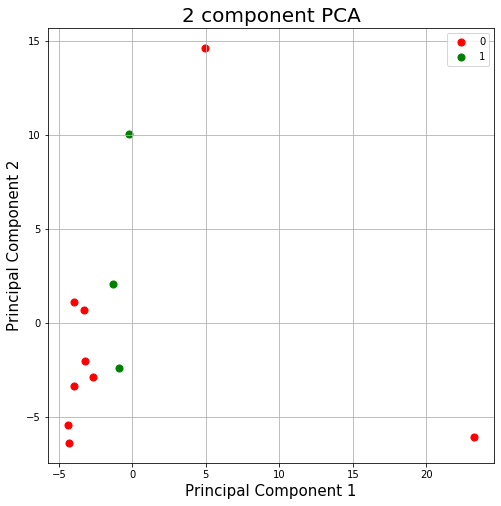

In [13]:
def PCADL(data, userfile): #finds correlation between beliefs and whether theyve ever been depressed
    uss = userfile.sort_values(by = ['UID'])
    #uss.set_index('UID', inplace = True)
    us = uss['Depress_life']

    groupedquestions = (data.groupby(["question", "email"]).agg( ['mean'] ).unstack(level = -1))
    y = groupedquestions.fillna(groupedquestions.mean())
    x = (y.T)

    feature = x.columns.values
    features = x.loc[:, feature].values
    target = uss.loc[:,['Depress_life']].values

    features = StandardScaler().fit_transform(features)

    #scaler = StandardScaler()
    #z = scaler.fit(x)
    #print (z)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, uss[['Depress_life']]], axis = 1)[:-1]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Depress_life'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = color
            , s = 50)
    ax.legend(targets)
    ax.grid()

    #plt.show()
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

PCADL(extract, userfile)

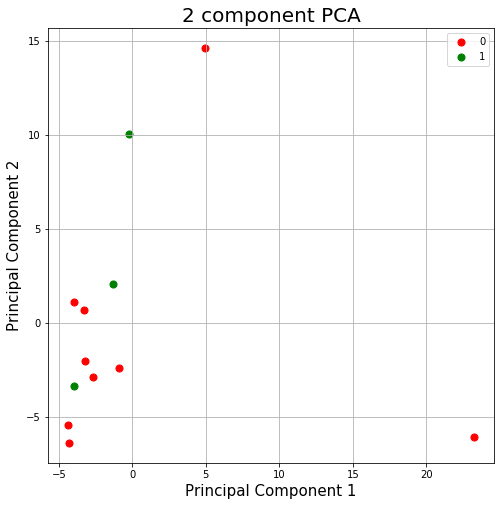

[0.26218491 0.18112503]
[25.76532951 21.41514802]


In [14]:
def PCADC(data, userfile): #finds correlation between beliefs and whether theyve ever been depressed
    uss = userfile.sort_values(by = ['UID'])
    #uss.set_index('UID', inplace = True)
    us = uss['Depress_pres']


    groupedquestions = (data.groupby(["question", "email"]).agg( ['mean'] ).unstack(level = -1))
    y = groupedquestions.fillna(groupedquestions.mean())
    x = (y.T)

    feature = x.columns.values
    features = x.loc[:, feature].values
    target = uss.loc[:,['Depress_pres']].values

    features = StandardScaler().fit_transform(features)

    #scaler = StandardScaler()
    #z = scaler.fit(x)
    #print (z)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, uss[['Depress_pres']]], axis = 1)[:-1]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Depress_pres'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = color
            , s = 50)
    ax.legend(targets)
    ax.grid()

    plt.show()
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

PCADC(extract, userfile)

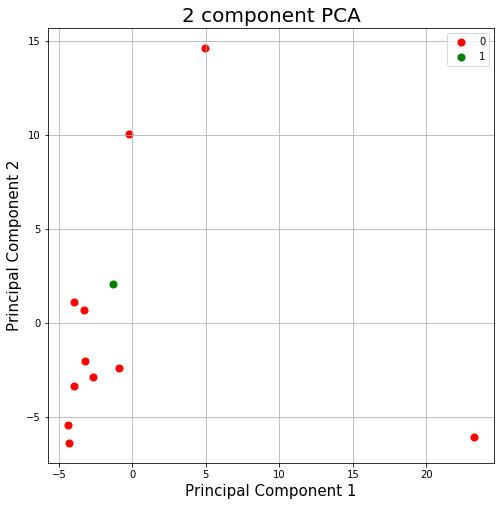

[0.26218491 0.18112503]
[25.76532951 21.41514802]


In [15]:
def PCAAL(data, userfile): #finds correlation between beliefs and whether theyve ever been depressed
    uss = userfile.sort_values(by = ['UID'])
    #uss.set_index('UID', inplace = True)
    us = uss['Anxious_life']

    groupedquestions = (data.groupby(["question", "email"]).agg( ['mean'] ).unstack(level = -1))
    y = groupedquestions.fillna(groupedquestions.mean())
    x = (y.T)

    feature = x.columns.values
    features = x.loc[:, feature].values
    target = uss.loc[:,['Anxious_life']].values

    features = StandardScaler().fit_transform(features)

    #scaler = StandardScaler()
    #z = scaler.fit(x)
    #print (z)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, uss[['Anxious_life']]], axis = 1)[:-1]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Anxious_life'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = color
            , s = 50)
    ax.legend(targets)
    ax.grid()

    plt.show()
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

PCAAL(extract, userfile)

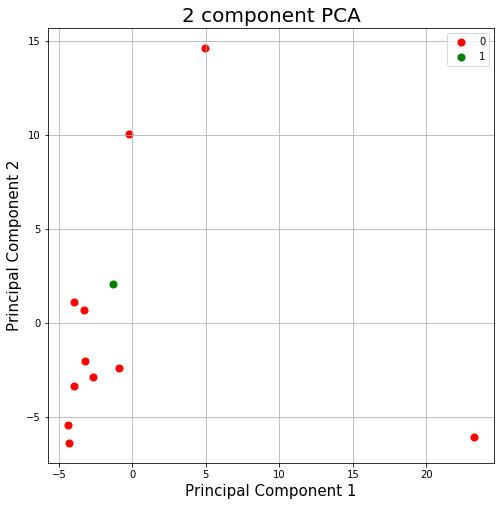

[0.26218491 0.18112503]
[25.76532951 21.41514802]


In [16]:
def PCAAC(data, userfile): #finds correlation between beliefs and whether theyve ever been depressed
    uss = userfile.sort_values(by = ['UID'])
    #uss.set_index('UID', inplace = True)
    us = uss['Anxious_pres']


    groupedquestions = (data.groupby(["question", "email"]).agg( ['mean'] ).unstack(level = -1))
    y = groupedquestions.fillna(groupedquestions.mean())
    x = (y.T)

    feature = x.columns.values
    features = x.loc[:, feature].values
    target = uss.loc[:,['Anxious_pres']].values

    features = StandardScaler().fit_transform(features)

    #scaler = StandardScaler()
    #z = scaler.fit(x)
    #print (z)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, uss[['Anxious_pres']]], axis = 1)[:-1]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Anxious_pres'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = color
            , s = 50)
    ax.legend(targets)
    ax.grid()

    plt.show()
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

PCAAC(extract, userfile)

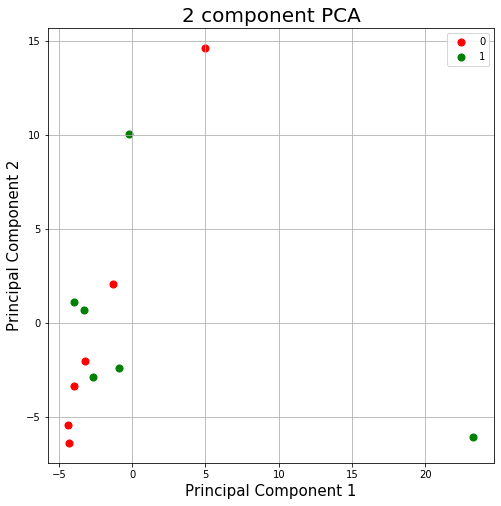

[0.26218491 0.18112503]
[25.76532951 21.41514802]


In [17]:
def PCAG(data, userfile): #finds correlation between beliefs and whether theyve ever been depressed
    uss = userfile.sort_values(by = ['UID'])
    #uss.set_index('UID', inplace = True)
    us = uss['Gender']


    groupedquestions = (data.groupby(["question", "email"]).agg( ['mean'] ).unstack(level = -1))
    y = groupedquestions.fillna(groupedquestions.mean())
    x = (y.T)

    feature = x.columns.values
    features = x.loc[:, feature].values
    target = uss.loc[:,['Gender']].values

    features = StandardScaler().fit_transform(features)

    #scaler = StandardScaler()
    #z = scaler.fit(x)
    #print (z)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features)
    principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, uss[['Gender']]], axis = 1)[:-1]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Gender'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            , finalDf.loc[indicesToKeep, 'principal component 2']
            , c = color
            , s = 50)
    ax.legend(targets)
    ax.grid()

    plt.show()
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

PCAG(extract, userfile)

In [18]:
def anxious(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How anxious are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])
    print (result)

In [19]:
def depressed(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How anxious are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])
    print (result)



In [20]:
def angry(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How angry are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [21]:
def mood(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [22]:
def day(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How has your day been today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [23]:
def excited(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How excited are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [24]:
def worried(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How worried are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [25]:
def confident(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How confident are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [26]:
def sad(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How sad are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [27]:
def calm(result):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    howyoufeel = result.loc[['How calm are you feeling today?']]
    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)
    result.rename(columns={"date" : "score"} , inplace = True)
    result.drop(columns=['email'])

    print (result)



In [28]:
def frustrated(result, mood):
    result.drop(columns=['email'])
    result.set_index('question', inplace = True)
    result.sort_index(axis=0, inplace = True)
    mood.set_index('question', inplace = True)
    mood.sort_index(axis=0, inplace = True)
    a = mood.drop_duplicates()
    howyoufeel = a.loc[['How frustrated are you feeling today?']]

    answerfeel = howyoufeel['answer']
    datefeel = howyoufeel['date']
    replacementfeel = dict(zip(datefeel,answerfeel))
    result.replace(replacementfeel, inplace = True)

    result.rename(columns={"date" : "frustration"} , inplace = True)
    b = result.drop(columns=['email'])
    b.groupby(['question'])

    thisdict = { "Apr 23, 2020": numpy.NaN}
    b.replace(thisdict, inplace = True)

    return (b)
#print (frustrated(extract(), moods()))


In [130]:
def posneg(data, beliefs, emails): #edit as needed to include all users and return
    positivebeliefs = beliefs[0]
    negativebeliefs = beliefs[1]

    e = em
    for email in e:
        emailee = "hhh@gmail.com"
        data.sort_values("question", axis = 0, ascending = True, inplace = True)
        g = data.groupby(["email", "question"]).agg( ['mean'] )
        g.stack()
        a = g.xs(email)
        aa = a.to_numpy()
        aq = numpy.array([a.index.to_numpy()]).T
        ar = numpy.hstack([aq,aa])
        adp = pd.DataFrame(data=ar, columns=['question', 'answerp'])
        adn = pd.DataFrame(data=ar, columns=['question', 'answern'])
        ap = pd.merge(positivebeliefs,adp,how="left",on=["question"])
        an = pd.merge(negativebeliefs,adn,how="left",on=["question"])
        result = pd.concat([ap, an], axis=1, sort=False)
        answerp = numpy.array(result['answerp'].to_numpy())
        answern = numpy.array(result['answern'].to_numpy())
        results = answerp - answern # more positive, means more agree with positive and reject the negative
        return len(results)
p = posneg(extract, beliefs, emails)
p

104

# ML

In [ ]:
import numpy as np # for mathmatical fumnctions
import pandas as pd# ..... for higher functions
import itertools#... for combinations or for probabilty
from sklearn.model_selection import train_test_split # for splitting data into test and train
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer #  for counting words in double and in int
from sklearn.linear_model import PassiveAggressiveClassifier # model used to predict data
from sklearn.metrics import accuracy_score, confusion_matrix # 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

In [ ]:
#Read the data
df=pd.read_csv('beliefs.csv')
print(df)

In [ ]:
y = df.Label 
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['Text'], y, test_size=0.33, random_state=53)

In [ ]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english') 

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set
count_test = count_vectorizer.transform(X_test)

In [ ]:
# Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(f"count test dim: {count_test.ndim}")
print(f"count test shape: {count_test.shape}")
print(f"tfidf test dim: {tfidf_test.ndim}")
print(f"tfidf test shape: {tfidf_test.shape}")

In [ ]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [ ]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

In [ ]:
print(count_df.equals(tfidf_df))

In [ ]:
count_df.head()

In [ ]:
tfidf_df.head()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1, 0])
plot_confusion_matrix(cm, classes=[1, 0])

In [ ]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1, 0])
plot_confusion_matrix(cm, classes=[1, 0])


In [ ]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [ ]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1, 0])
plot_confusion_matrix(cm, classes=[1, 0])

In [ ]:
linear_clf.fit(count_train, y_train)
pred = linear_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1, 0])
plot_confusion_matrix(cm, classes=[1, 0])